In [2]:
library(tidyverse)
library(DBI)
library(duckdb)
library(purrr)
library(jsonlite)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten




In [3]:
theme_set(theme_minimal())

In [4]:
con = dbConnect(duckdb::duckdb(), ":memory:")

In [15]:
df_status_pct <- dbGetQuery(con, 
                  "SELECT 
                    filename,
                    AgentID,
                    carrier_status,
                    count(*)  as steps_in_state
                   FROM read_parquet('../data/results/df_adata_*.parquet', filename=true)
                   WHERE agent_type = 'CarrierAgent'
                   GROUP BY 1,2,3
                    
;")

In [17]:
df_status_pct %>%
    arrange(-steps_in_state) %>%
head()

,filename,AgentID,carrier_status,steps_in_state
,<chr>,<dbl>,<chr>,<dbl>
1,../data/results/df_adata_exp1_47_asof_2023-01-03T03:49:43.373198_run_2023-01-03T06:06:32.662421.parquet,263,in transit,1406
2,../data/results/df_adata_exp1_92_asof_2023-01-03T03:49:43.578427_run_2023-01-03T07:57:22.113703.parquet,290,in transit,1389
3,../data/results/df_adata_exp1_91_asof_2023-01-03T03:49:43.564993_run_2023-01-03T07:54:47.579381.parquet,309,in transit,1384
4,../data/results/df_adata_exp1_27_asof_2023-01-03T03:49:43.293688_run_2023-01-03T05:00:19.776222.parquet,405,in transit,1384
5,../data/results/df_adata_exp1_83_asof_2023-01-03T03:49:43.534511_run_2023-01-03T07:34:15.292984.parquet,299,in transit,1382
6,../data/results/df_adata_exp1_55_asof_2023-01-03T03:49:43.413053_run_2023-01-03T06:25:05.308612.parquet,166,in transit,1381


`summarise()` has grouped output by 'run_id', 'run_n'. You can override using the `.groups` argument.



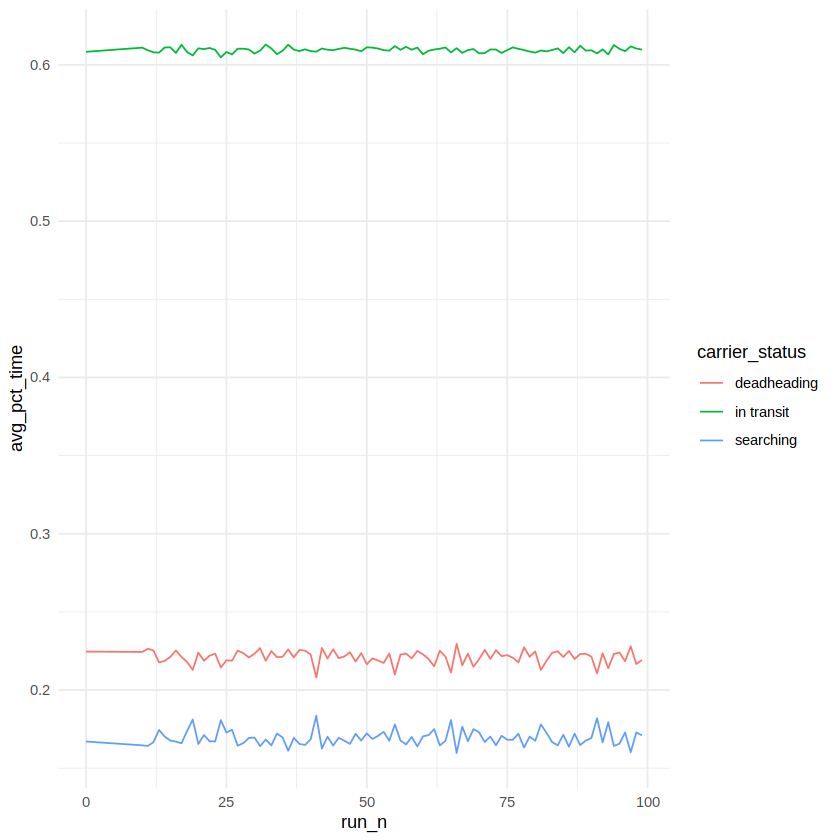

In [35]:
df_status_pct %>%
filter(carrier_status %in% c('in transit', 'searching','deadheading')) %>%
mutate(run_id = substr(filename, 26,32),
          run_n = as.numeric(str_remove( substr(run_id, 6,8),"_" ))) %>%
    group_by(run_id,run_n, carrier_status) %>%
    summarize(avg_pct_time = mean(steps_in_state/2000, na.rm = T)) %>%
    ungroup() %>%
    ggplot(aes(x = run_n, y = avg_pct_time, color = carrier_status)) +
           geom_line()

In [ ]:
# hm wonder if these runs weren't actually setting

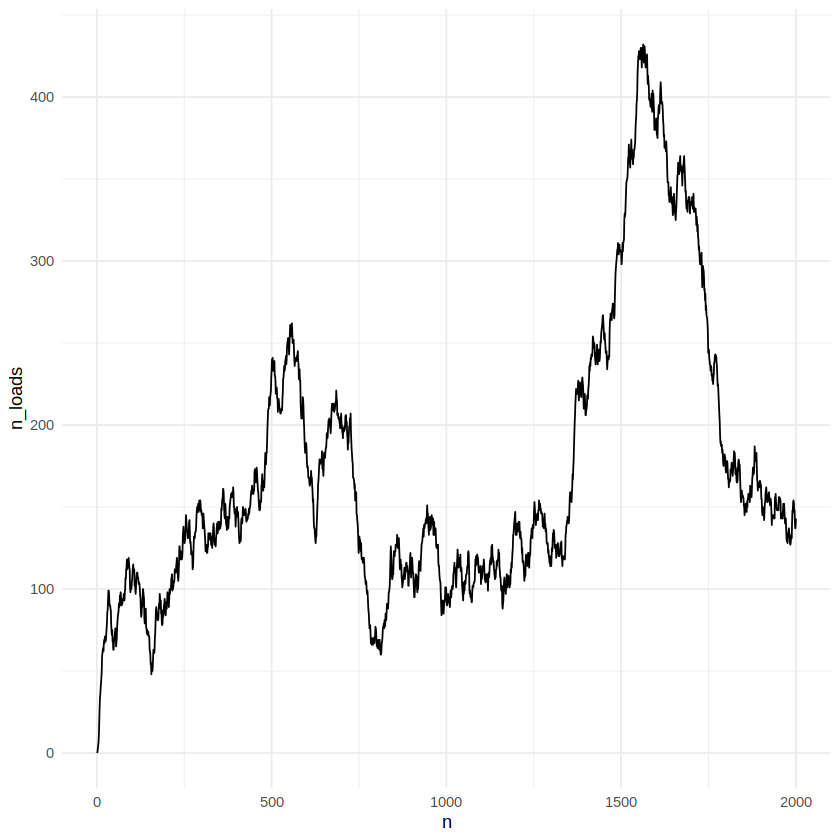

In [46]:
# abm/data/results/df_mdata_exp1_80_asof_2023-01-03T03:49:43.523495_run_2023-01-03T07:26:33.057588.parquet
dbGetQuery(con, 
                  "SELECT * 
                   FROM read_parquet('../data/results/df_mdata_exp1_66_*.parquet', filename=true)                
;") %>%mutate(n = row_number()) %>%

ggplot(aes(x = n, y = n_loads) ) +
geom_line()

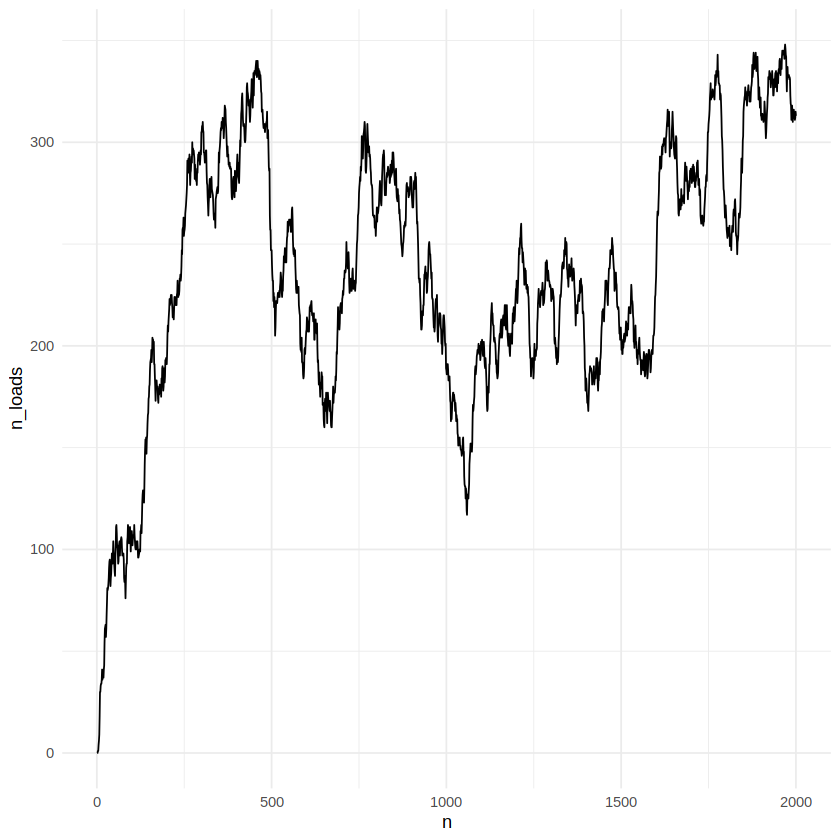

In [39]:
tmp %>%
mutate(n = row_number()) %>%

ggplot(aes(x = n, y = n_loads) ) +
geom_line()
# head()

In [ ]:
con = dbConnect(duckdb::duckdb(), ":memory:")
tmp <- dbGetQuery(con, 
                  "SELECT * 
                   FROM read_parquet('../data/results/df_adata_*.parquet', filename=true)
                    
;")

In [5]:
tmp %>% head()

,agent_type,carrier_loads_moved,carrier_status,Step,AgentID,filename
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
1,ShipperAgent,NA,NA,1,0,../data/results/df_adata_test_asof_2023-01-03T02:55:53.010884_run_2023-01-03T02:57:08.201718.parquet
2,ShipperAgent,NA,NA,1,1,../data/results/df_adata_test_asof_2023-01-03T02:55:53.010884_run_2023-01-03T02:57:08.201718.parquet
3,ShipperAgent,NA,NA,1,2,../data/results/df_adata_test_asof_2023-01-03T02:55:53.010884_run_2023-01-03T02:57:08.201718.parquet
4,ShipperAgent,NA,NA,1,3,../data/results/df_adata_test_asof_2023-01-03T02:55:53.010884_run_2023-01-03T02:57:08.201718.parquet
5,ShipperAgent,NA,NA,1,4,../data/results/df_adata_test_asof_2023-01-03T02:55:53.010884_run_2023-01-03T02:57:08.201718.parquet
6,ShipperAgent,NA,NA,1,5,../data/results/df_adata_test_asof_2023-01-03T02:55:53.010884_run_2023-01-03T02:57:08.201718.parquet


`summarise()` has grouped output by 'AgentID'. You can override using the `.groups` argument.



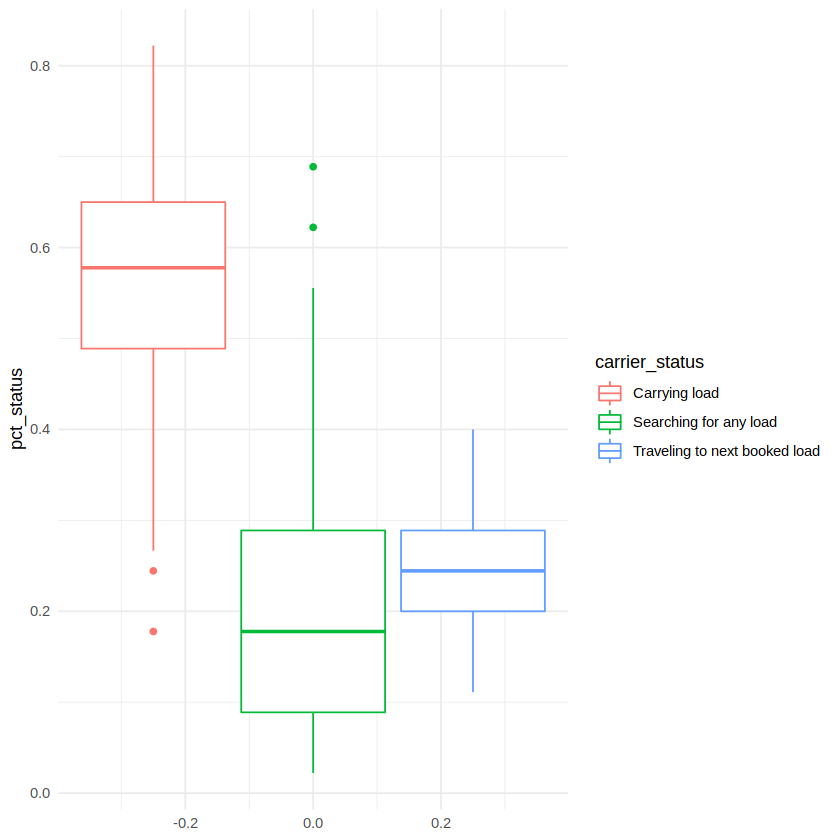

In [15]:
tmp %>%
    filter(agent_type == 'CarrierAgent',
          Step > 5) %>%
    group_by(AgentID, carrier_status) %>%
    summarize(n = n()) %>%
    mutate(pct_status = n / sum(n)) %>%
    ggplot(aes(x = pct_status, color = carrier_status)) +
           geom_boxplot()+
           coord_flip()


In [17]:
tmp %>% 
    filter(agent_type == 'CarrierAgent',
          Step == 50) %>%
    summary()

  agent_type        carrier_loads_moved carrier_status          Step   
 Length:400         Min.   :2.000       Length:400         Min.   :50  
 Class :character   1st Qu.:4.000       Class :character   1st Qu.:50  
 Mode  :character   Median :5.000       Mode  :character   Median :50  
                    Mean   :5.098                          Mean   :50  
                    3rd Qu.:6.000                          3rd Qu.:50  
                    Max.   :9.000                          Max.   :50  
    AgentID        filename        
 Min.   : 50.0   Length:400        
 1st Qu.:149.8   Class :character  
 Median :249.5   Mode  :character  
 Mean   :249.5                     
 3rd Qu.:349.2                     
 Max.   :449.0                     

In [ ]:
# make config dataframe
path <- "./your_path"
files <- dir(path, pattern = "*.json")

data <- files %>%
       map_df(~fromJSON(file.path(path, .), flatten = TRUE))